In [12]:
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

### Combine All Raw CSV File

In [13]:
data_one = pd.read_csv("data/raw_data/2000to2012.csv")
data_two = pd.read_csv("data/raw_data/2012to2014.csv")
data_three = pd.read_csv("data/raw_data/jan2015toDec2016.csv")
data_four = pd.read_csv("data/raw_data/jan2017upwards.csv")

data_one = data_one.drop(columns=["block", "street_name"])
data_two = data_two.drop(columns=["block", "street_name"])
data_three = data_three.drop(columns=["block", "street_name"])
data_four = data_four.drop(columns=["block", "street_name"])

combined_data = pd.concat([data_one, data_two, data_three, data_four], ignore_index=True)

sorted_combined_data = combined_data.sort_values(by='month', ascending=True)

sorted_combined_data['remaining_lease'] = sorted_combined_data['remaining_lease'].fillna('NULL')

sorted_combined_data[['Year', 'Month']] = sorted_combined_data['month'].str.split('-', expand=True).astype(int)
sorted_combined_data

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month
0,2000-01,ANG MO KIO,3 ROOM,07 TO 09,69.0,Improved,1986,147000.0,NULL,2000,1
1588,2000-01,QUEENSTOWN,3 ROOM,04 TO 06,66.0,Improved,1970,145000.0,NULL,2000,1
1589,2000-01,QUEENSTOWN,3 ROOM,16 TO 18,72.0,Improved,1970,208000.0,NULL,2000,1
1590,2000-01,QUEENSTOWN,3 ROOM,04 TO 06,72.0,Improved,1970,186000.0,NULL,2000,1
1591,2000-01,QUEENSTOWN,3 ROOM,01 TO 03,72.0,Improved,1970,182000.0,NULL,2000,1
...,...,...,...,...,...,...,...,...,...,...,...
633288,2024-03,HOUGANG,4 ROOM,01 TO 03,105.0,Model A,1990,538888.0,65 years 02 months,2024,3
633289,2024-03,HOUGANG,4 ROOM,10 TO 12,91.0,New Generation,1985,538000.0,60 years 05 months,2024,3
633290,2024-03,HOUGANG,4 ROOM,07 TO 09,98.0,New Generation,1978,538000.0,53 years 03 months,2024,3
633276,2024-03,HOUGANG,4 ROOM,04 TO 06,92.0,Model A,2019,573000.0,94 years 07 months,2024,3


In [14]:
cols = sorted_combined_data.columns.tolist()  # Convert column names to a list
cols = cols[-2:] + cols[:-2]
sorted_combined_data = sorted_combined_data[cols]
sorted_combined_data = sorted_combined_data.drop(columns="month")
sorted_combined_data

,Year,Month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000,1,ANG MO KIO,3 ROOM,07 TO 09,69.0,Improved,1986,147000.0,NULL
1588,2000,1,QUEENSTOWN,3 ROOM,04 TO 06,66.0,Improved,1970,145000.0,NULL
1589,2000,1,QUEENSTOWN,3 ROOM,16 TO 18,72.0,Improved,1970,208000.0,NULL
1590,2000,1,QUEENSTOWN,3 ROOM,04 TO 06,72.0,Improved,1970,186000.0,NULL
1591,2000,1,QUEENSTOWN,3 ROOM,01 TO 03,72.0,Improved,1970,182000.0,NULL
...,...,...,...,...,...,...,...,...,...,...
633288,2024,3,HOUGANG,4 ROOM,01 TO 03,105.0,Model A,1990,538888.0,65 years 02 months
633289,2024,3,HOUGANG,4 ROOM,10 TO 12,91.0,New Generation,1985,538000.0,60 years 05 months
633290,2024,3,HOUGANG,4 ROOM,07 TO 09,98.0,New Generation,1978,538000.0,53 years 03 months
633276,2024,3,HOUGANG,4 ROOM,04 TO 06,92.0,Model A,2019,573000.0,94 years 07 months


In [15]:
raw_CPIData = pd.read_csv('data/raw_data/CPID.csv',header=None)
t_CPIData = raw_CPIData.T
t_CPIData.columns=t_CPIData.iloc[0]
CPIData= t_CPIData.drop(0)
CPIData.head()

,DataSeries,All Items,Food,Food Excl Food Serving Services,Bread & Cereals,Rice,Flour,Bread,Noodles & Pasta,Biscuits & Cookies,...,Spirits & Wine,Beer,Cigarettes,Personal Effects,Jewellery & Watches,Other Personal Effects,Social Services,Other Miscellaneous Services,All Items Less Imputed Rentals On Owner-Occupied Accommodation,All Items Less Accommodation
1,2024Jan,-0.7,1,1.1,0.6,-1.6,-0.9,0.6,0.6,2,...,0.9,-0.4,2.7,1.1,-0.2,1.7,0.4,2.9,-0.9,-0.1
2,2023Sep,0.5,0.1,0,0.2,0.3,-1.2,0.1,0.7,0.3,...,1.3,-2.1,0,-1.6,0,-2.4,0,0,0.5,0.6
3,2023Oct,0.2,0.2,0.1,1,1.3,-0.7,1.5,1.4,0.4,...,1.8,2.5,0,0.6,1.9,0,0.3,0,0.2,0.6
4,2023Nov,-0.2,0.3,0.5,0.1,0.6,0.7,0,-0.3,-1,...,0,-1.4,0,1.2,0,1.8,0,0,-0.3,-0.7
5,2023May,0.3,0.4,0.8,0.6,2,6.4,-0.7,0.5,0.6,...,4.8,1.6,0,0.2,0,0.3,0,-0.1,0.3,-0.4


In [16]:
CPIData['Year'] = CPIData['DataSeries'].str[:4]  # Extract the first four characters as the year
CPIData['Month'] = CPIData['DataSeries'].str[4:]
cols = CPIData.columns.tolist()  # Convert column names to a list
cols = cols[-2:] + cols[:-2]  # Move the last two columns to the front
CPIData_updated = CPIData[cols]
CPIData_clean = CPIData_updated.drop(columns="DataSeries")


In [17]:
month_map = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12',
}

CPIData_clean["Month"] = CPIData_clean["Month"].map(month_map)
CPIData_clean

,Year,Month,All Items,Food,Food Excl Food Serving Services,Bread & Cereals,Rice,Flour,Bread,Noodles & Pasta,...,Spirits & Wine,Beer,Cigarettes,Personal Effects,Jewellery & Watches,Other Personal Effects,Social Services,Other Miscellaneous Services,All Items Less Imputed Rentals On Owner-Occupied Accommodation,All Items Less Accommodation
1,2024,01,-0.7,1,1.1,0.6,-1.6,-0.9,0.6,0.6,...,0.9,-0.4,2.7,1.1,-0.2,1.7,0.4,2.9,-0.9,-0.1
2,2023,09,0.5,0.1,0,0.2,0.3,-1.2,0.1,0.7,...,1.3,-2.1,0,-1.6,0,-2.4,0,0,0.5,0.6
3,2023,10,0.2,0.2,0.1,1,1.3,-0.7,1.5,1.4,...,1.8,2.5,0,0.6,1.9,0,0.3,0,0.2,0.6
4,2023,11,-0.2,0.3,0.5,0.1,0.6,0.7,0,-0.3,...,0,-1.4,0,1.2,0,1.8,0,0,-0.3,-0.7
5,2023,05,0.3,0.4,0.8,0.6,2,6.4,-0.7,0.5,...,4.8,1.6,0,0.2,0,0.3,0,-0.1,0.3,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1961,07,0.2,0.4,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
753,1961,02,0.1,0.1,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
754,1961,12,-0.1,-0.1,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
755,1961,08,1,1.8,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na


In [18]:
datetoextract_year = CPIData_clean["Year"]
datetoextract_month = CPIData_clean["Month"]
indextoextract=CPIData_clean["        Accommodation"]
AccomsCPI = pd.DataFrame()
AccomsCPI["Year"] = datetoextract_year.astype(int)
AccomsCPI["Month"] = datetoextract_month.astype(int)
AccomsCPI["CPIvalue"] = indextoextract
AccomsCPI['AdjustmentValue'] = 1.0
AccomsCPI = AccomsCPI[AccomsCPI.ne('na').all(axis=1)]
AccomsCPI["CPIvalue"] = AccomsCPI["CPIvalue"].astype(float)
AccomsCPI=AccomsCPI.sort_values(by=['Year','Month'], ascending=[False,False])
AccomsCPI = AccomsCPI.reset_index(drop=True)
AccomsCPI

,Year,Month,CPIvalue,AdjustmentValue
0,2024,1,-2.7,1.0
1,2023,12,0.2,1.0
2,2023,11,1.9,1.0
3,2023,10,-1.4,1.0
4,2023,9,0.3,1.0
...,...,...,...,...
283,2000,6,0.0,1.0
284,2000,5,0.0,1.0
285,2000,4,0.0,1.0
286,2000,3,0.0,1.0


In [19]:
# Loop to calculate AdjustmentValue
for idx,cpi in enumerate(AccomsCPI['CPIvalue']):
    if idx != 0:
        AccomsCPI.loc[idx,"AdjustmentValue"] = AccomsCPI.loc[idx-1, "AdjustmentValue"] * (1 + (AccomsCPI.loc[idx-1, 'CPIvalue']/100))

AccomsCPI.dtypes

Year                 int64
Month                int64
CPIvalue           float64
AdjustmentValue    float64
dtype: object

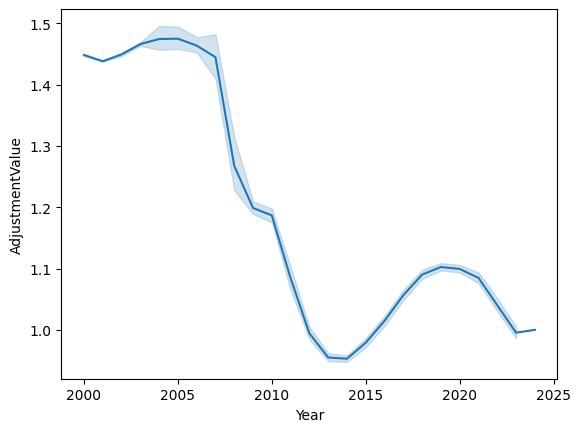

In [20]:
ax = sb.lineplot(data=AccomsCPI,x="Year",y="AdjustmentValue")

In [21]:
merged_data = pd.merge(sorted_combined_data, AccomsCPI, on=['Year','Month'])
merged_data['AdjustmentValue'] = merged_data['AdjustmentValue'].fillna("NA")
merged_data

,Year,Month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,CPIvalue,AdjustmentValue
0,2000,2,QUEENSTOWN,5 ROOM,04 TO 06,138.0,Model A,1996,526000.0,NULL,0.0,1.450914
1,2000,2,QUEENSTOWN,5 ROOM,04 TO 06,125.0,Standard,1977,470000.0,NULL,0.0,1.450914
2,2000,2,QUEENSTOWN,5 ROOM,01 TO 03,117.0,Standard,1978,435000.0,NULL,0.0,1.450914
3,2000,2,QUEENSTOWN,5 ROOM,13 TO 15,117.0,Standard,1978,470000.0,NULL,0.0,1.450914
4,2000,2,QUEENSTOWN,5 ROOM,19 TO 21,123.0,Standard,1976,435000.0,NULL,0.0,1.450914
...,...,...,...,...,...,...,...,...,...,...,...,...
628402,2024,1,HOUGANG,4 ROOM,01 TO 03,90.0,Model A,2003,495000.0,78 years 05 months,-2.7,1.000000
628403,2024,1,HOUGANG,4 ROOM,07 TO 09,94.0,Model A,2019,630000.0,94 years 11 months,-2.7,1.000000
628404,2024,1,HOUGANG,4 ROOM,01 TO 03,93.0,Model A,2018,528000.0,93 years 10 months,-2.7,1.000000
628405,2024,1,HOUGANG,4 ROOM,07 TO 09,93.0,Model A,2019,630000.0,94 years 08 months,-2.7,1.000000


In [22]:
# Adjust the sale price to today's cost
merged_data['resale_price_adjusted'] = merged_data['resale_price'] * merged_data['AdjustmentValue']

# Drop the unnecessary columns after adjustment
columns_to_drop = ['CPIvalue']
merged_data.drop(columns=[col for col in columns_to_drop if col in merged_data.columns], axis=1, inplace=True)

#changing "x" years and "y" months into x+(y/12) years ---> eg 4years 6 months = 4.5years 
merged_data['years'] = merged_data['remaining_lease'].str.extract(r'(\d+) years').astype(float)
merged_data['months'] = merged_data['remaining_lease'].str.extract(r'(\d+) months').astype(float)
merged_data['remaining_lease'] = merged_data['years'] + merged_data['months'] / 12
merged_data = merged_data.drop(['years', 'months'], axis=1)

#changing 7 to 9 floor into average of 8th floor
merged_data['lower_storey'] = merged_data['storey_range'].str.extract(r'(\d+) TO (\d+)').astype(float).iloc[:,0]
merged_data['upper_storey'] = merged_data['storey_range'].str.extract(r'(\d+) TO (\d+)').astype(float).iloc[:,1]
merged_data['average_storey'] = (merged_data['lower_storey'] + merged_data['upper_storey']) / 2
columns_to_drop_final = ['lower_storey', 'upper_storey', 'storey_range', 'resale_price', 'AdjustmentValue']
merged_data = merged_data.drop(columns=[col for col in columns_to_drop_final if col in merged_data.columns], axis=1)

merged_data['remaining_lease'] = merged_data['remaining_lease'].fillna(np.nan)

merged_data




,Year,Month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price_adjusted,average_storey
0,2000,2,QUEENSTOWN,5 ROOM,138.0,Model A,1996,NaN,763180.858672,5.0
1,2000,2,QUEENSTOWN,5 ROOM,125.0,Standard,1977,NaN,681929.664593,5.0
2,2000,2,QUEENSTOWN,5 ROOM,117.0,Standard,1978,NaN,631147.668294,2.0
3,2000,2,QUEENSTOWN,5 ROOM,117.0,Standard,1978,NaN,681929.664593,14.0
4,2000,2,QUEENSTOWN,5 ROOM,123.0,Standard,1976,NaN,631147.668294,20.0
...,...,...,...,...,...,...,...,...,...,...
628402,2024,1,HOUGANG,4 ROOM,90.0,Model A,2003,78.416667,495000.000000,2.0
628403,2024,1,HOUGANG,4 ROOM,94.0,Model A,2019,94.916667,630000.000000,8.0
628404,2024,1,HOUGANG,4 ROOM,93.0,Model A,2018,93.833333,528000.000000,2.0
628405,2024,1,HOUGANG,4 ROOM,93.0,Model A,2019,94.666667,630000.000000,8.0


/Users/kur0/Documents/Year1/sc1015_lab/SC1015_Mini_Proj/.mini/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kur0/Documents/Year1/sc1015_lab/SC1015_Mini_Proj/.mini/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kur0/Documents/Year1/sc1015_lab/SC1015_Mini_Proj/.mini/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


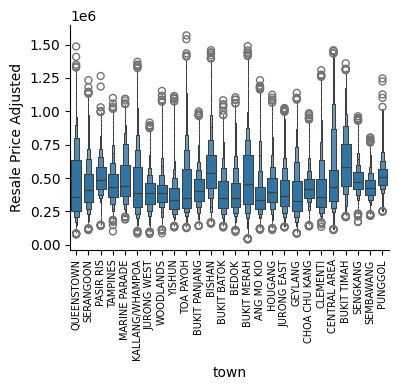

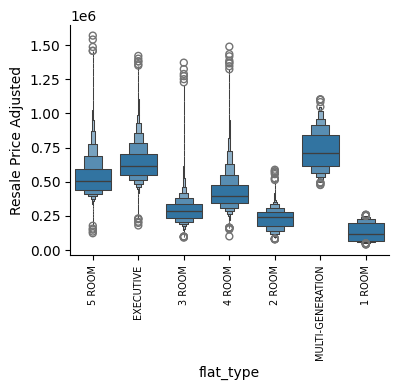

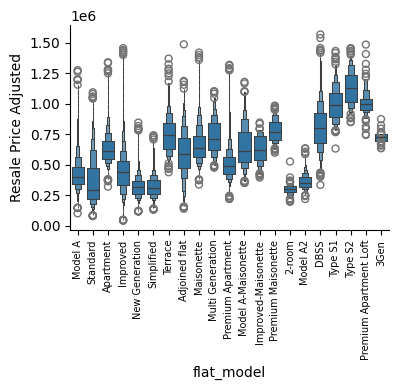

In [23]:
categoricaldata = pd.DataFrame(merged_data[['town', 'flat_type', 'flat_model', 'resale_price_adjusted']])
for column in ['town','flat_type','flat_model']:
    g = sb.FacetGrid(categoricaldata,height=4, sharex=False, sharey=False)
    g.map(sb.boxenplot, column, 'resale_price_adjusted')
    g.set_xticklabels(fontsize=7,rotation=90)  # Rotate x-axis labels if needed
    g.set_axis_labels(column, 'Resale Price Adjusted')
    g.tight_layout()


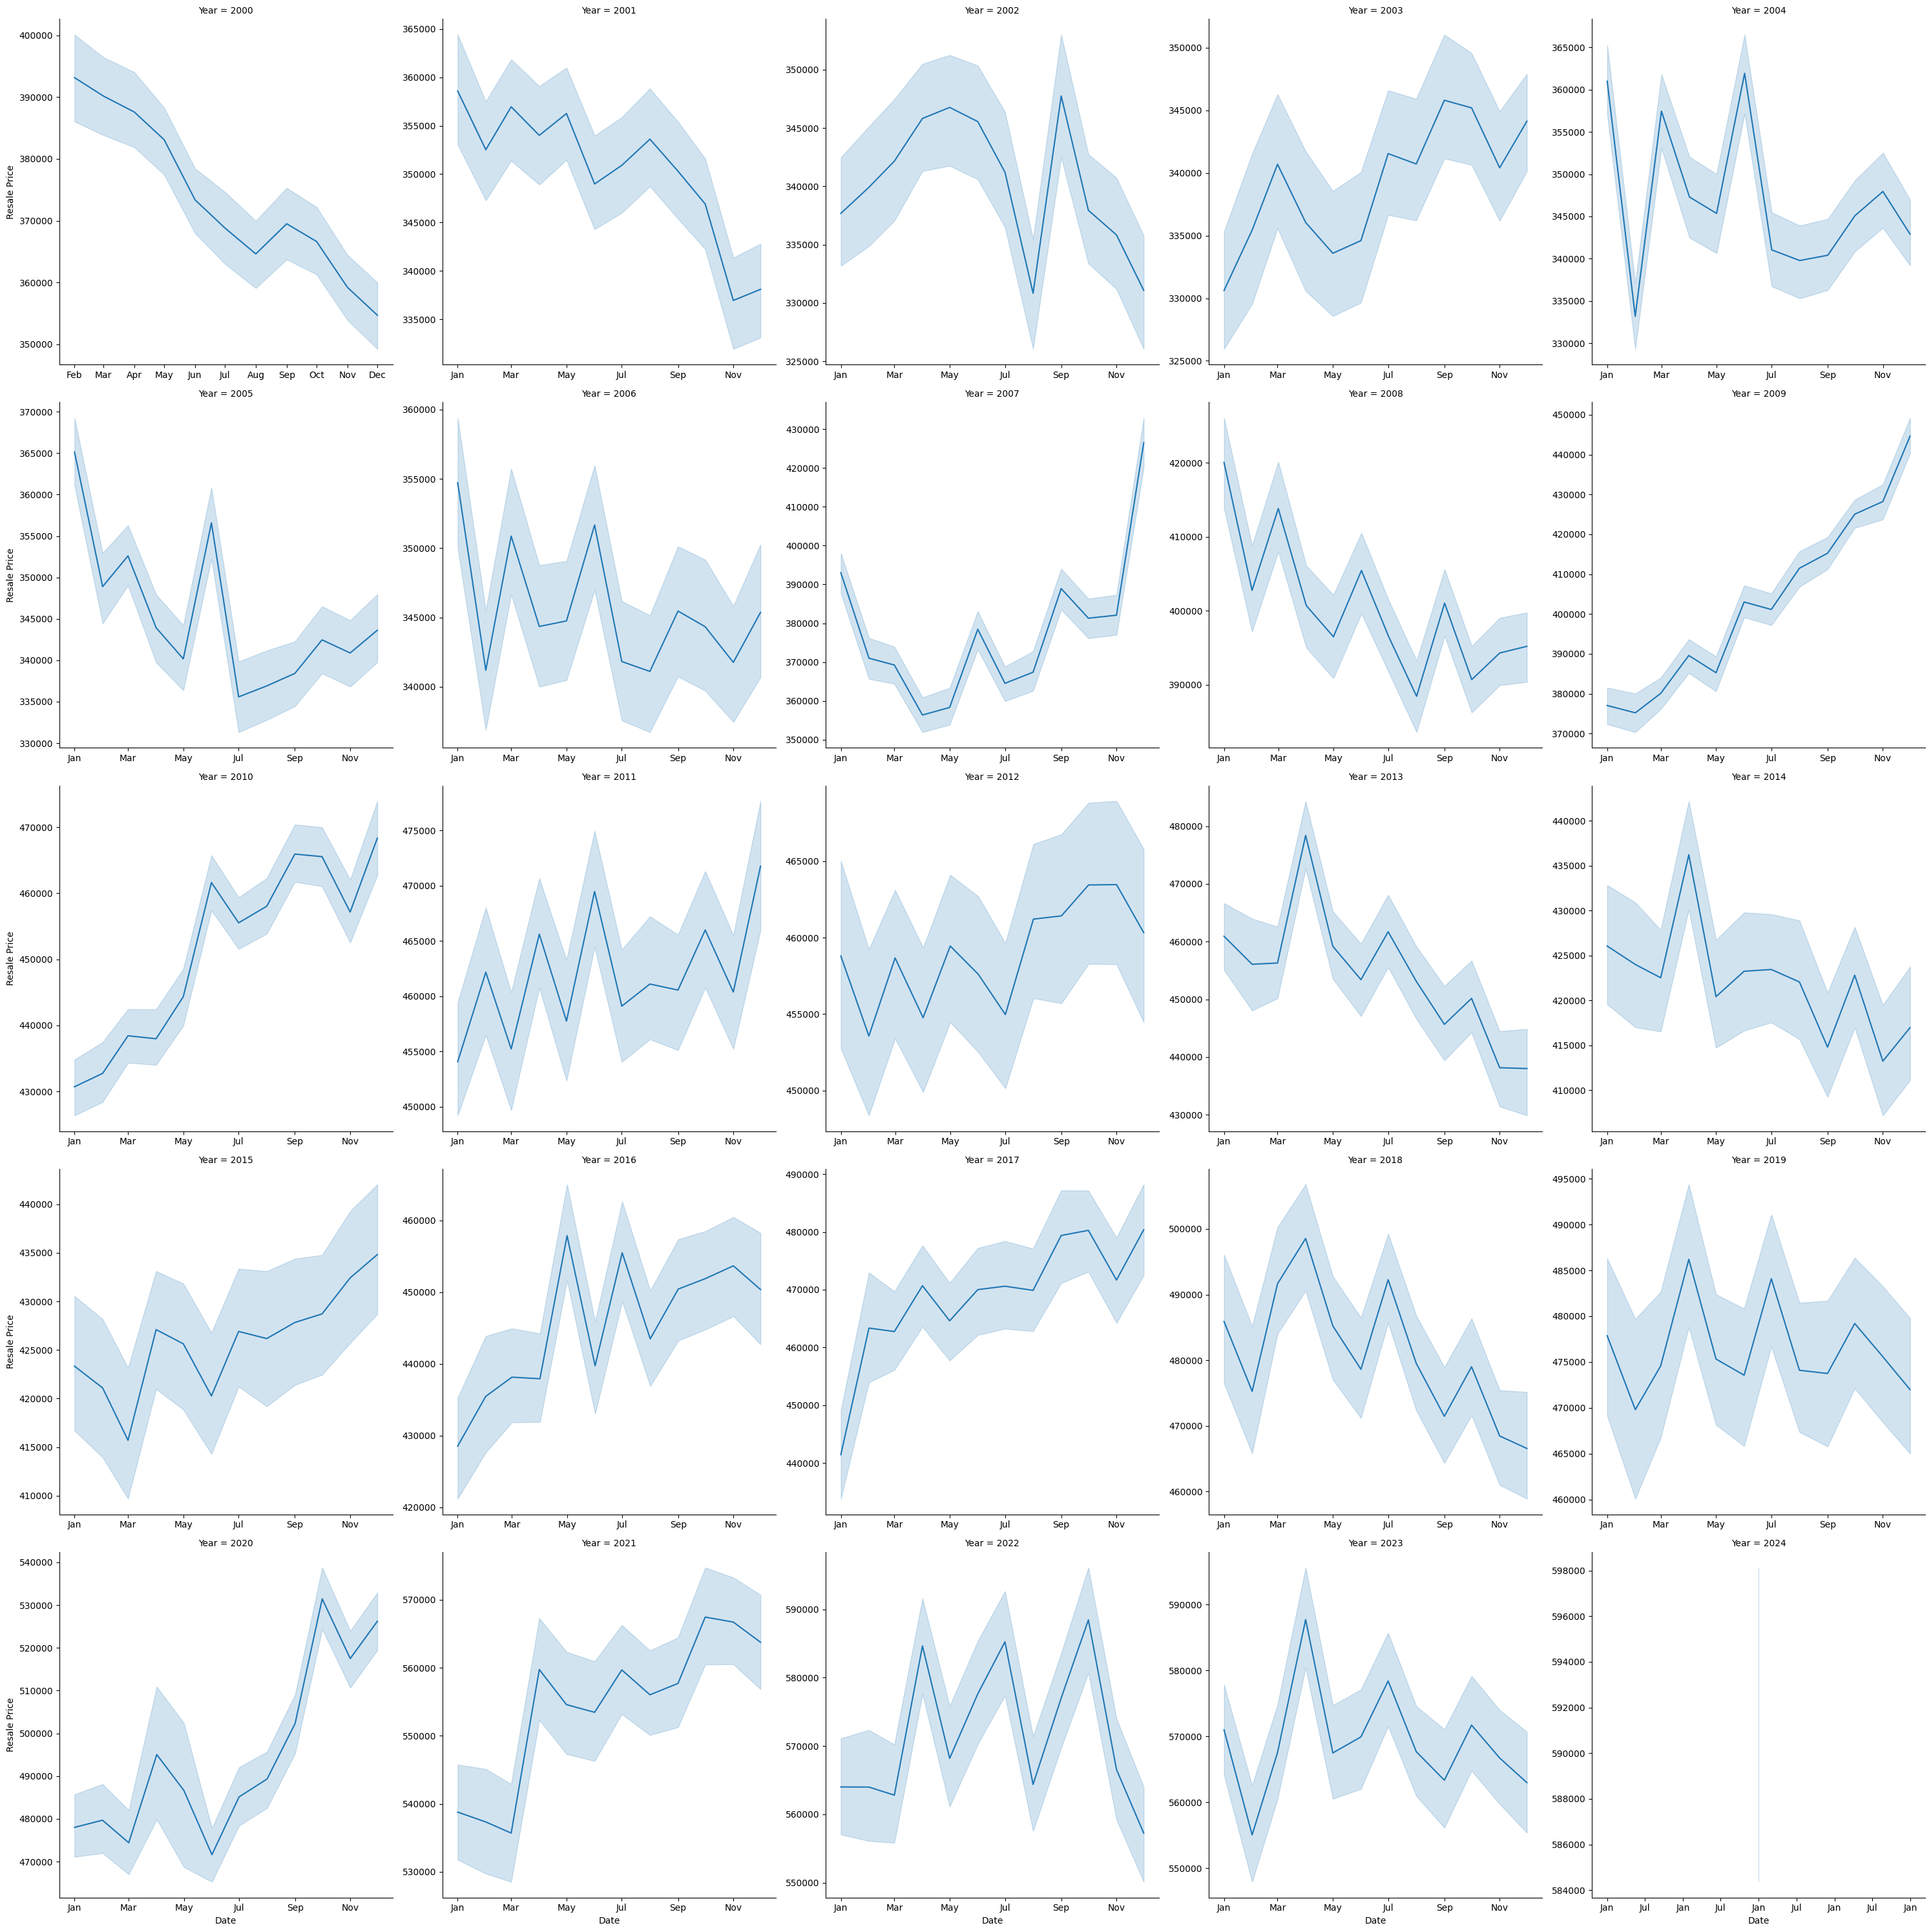

In [24]:
merged_data['date'] = pd.to_datetime(merged_data[['Year', 'Month']].assign(day=1))

g = sb.FacetGrid(merged_data, col="Year", col_wrap=5, height=6,sharex=False, sharey=False)
g.map(sb.lineplot, "date", "resale_price_adjusted")
g.set_axis_labels("Date", "Resale Price")

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

In [25]:
area_dict = {'QUEENSTOWN': 1, 'SERANGOON': 2, 'PASIR RIS': 3, 'TAMPINES': 4, 'MARINE PARADE': 5, 'KALLANG/WHAMPOA': 6, 'JURONG WEST': 7, 'WOODLANDS': 8, 'YISHUN': 9, 'TOA PAYOH': 10, 'BUKIT PANJANG': 11, 'BISHAN': 12, 'BUKIT BATOK': 13, 'BEDOK': 14, 'BUKIT MERAH': 15, 'ANG MO KIO': 16, 'HOUGANG': 17, 'JURONG EAST': 18, 'GEYLANG': 19, 'CHOA CHU KANG': 20, 'CLEMENTI': 21, 'CENTRAL AREA': 22, 'BUKIT TIMAH': 23, 'SENGKANG': 24, 'SEMBAWANG': 25, 'PUNGGOL': 26}
model_type_dict = {'Model A': 1, 'Standard': 2, 'Apartment': 3, 'Improved': 4, 'New Generation': 5, 'Simplified': 6, 'Terrace': 7, 'Adjoined flat': 8, 'Maisonette': 9, 'Multi Generation': 10, 'Premium Apartment': 11, 'Model A-Maisonette': 12, 'Improved-Maisonette': 13, 'Premium Maisonette': 14, '2-room': 15, 'Model A2': 16, 'DBSS': 17, 'Type S1': 18, 'Type S2': 19, 'Premium Apartment Loft': 20, '3Gen': 21}
flat_type_dict = {'5 ROOM': 1, 'EXECUTIVE': 2, '3 ROOM': 3, '4 ROOM': 4, '2 ROOM': 5, 'MULTI-GENERATION': 6, '1 ROOM': 7}

In [26]:
merged_data['town'] = merged_data['town'].map(area_dict)
merged_data['flat_type'] = merged_data['flat_type'].map(flat_type_dict)
merged_data['flat_model'] = merged_data['flat_model'].map(model_type_dict)
merged_data = merged_data.dropna()

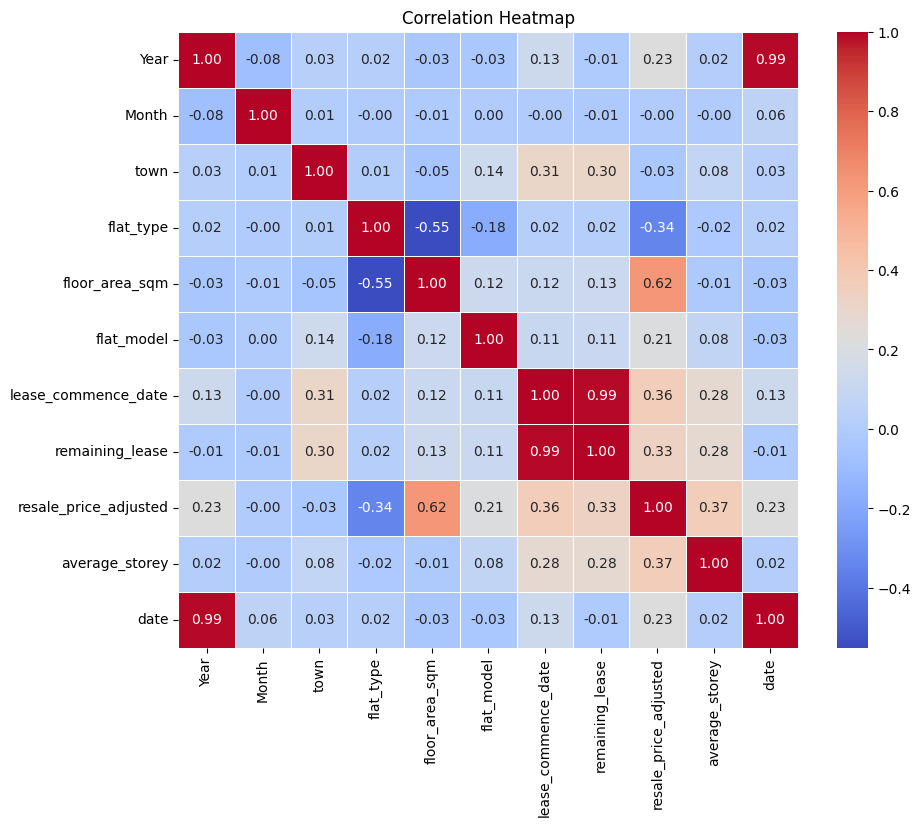

In [27]:
corr = merged_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
merged_data = merged_data.drop(columns=['Month','town','flat_type','date'])
merged_data.to_csv('data/clean_data/merged_data.csv',index=False)